# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

## Import Libraries



In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [6]:
df = pd.read_csv("Classified_Data.csv",index_col=0)

In [7]:
df.head(10)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
5,0.833928,1.523302,1.104743,1.021139,1.107377,1.010930,1.279538,1.280677,0.510350,1.528044,0
6,0.944705,1.251761,1.074885,0.286473,0.996440,0.428860,0.910805,0.755305,1.111800,1.110842,0
7,0.816174,1.088392,0.895343,0.243860,0.943123,1.045131,1.146536,1.341886,1.225324,1.425784,0
8,0.776551,1.463812,0.783825,0.337278,0.742215,1.072756,0.880300,1.312951,1.118165,1.225922,0
9,0.772280,0.515111,0.891596,0.940862,1.430568,0.885876,1.205231,0.596858,1.542580,0.981879,1


In [8]:
df['TARGET CLASS'].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [13]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [14]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn = KNeighborsClassifier(n_neighbors=1)#n_neighbors is k value ,it is optional

In [18]:
knn = KNeighborsClassifier()

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
pred = knn.predict(X_test)

C:\Users\Mohamed Arshad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Predictions and Evaluations

Let's evaluate our KNN model!

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(confusion_matrix(y_test,pred))

[[127  11]
 [ 12 150]]


In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       138
           1       0.93      0.93      0.93       162

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [24]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

C:\Users\Mohamed Arshad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mohamed Arshad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

Text(0, 0.5, 'Error Rate')

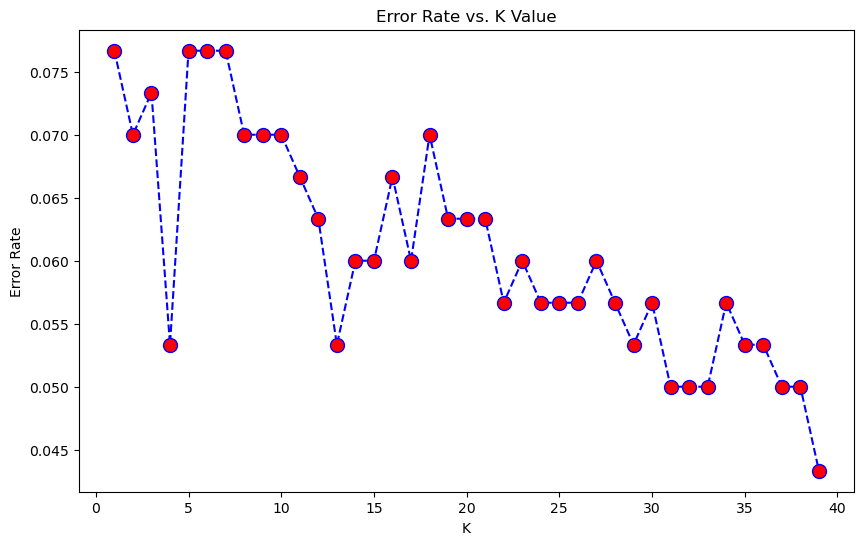

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [26]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[123  15]
 [  8 154]]


              precision    recall  f1-score   support

           0       0.94      0.89      0.91       138
           1       0.91      0.95      0.93       162

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



C:\Users\Mohamed Arshad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [27]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=39')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=39


[[129   9]
 [  9 153]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93       138
           1       0.94      0.94      0.94       162

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



C:\Users\Mohamed Arshad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
